Exercise Sheet 6.1 **Convolutional neural networks**

In [10]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import keras


class LogHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))


def main():
    # parameters
    batch_size = 100
    epochs = 17
    learning_rate = 0.5

    # loading the data from local directory
    f = np.load('mnist.npz')
    x_train, y_train = f['x_train'], f['y_train']
    x_valid, y_valid = f['x_test'], f['y_test']
    f.close()

    # number of training and test (validation) samples
    n_train = x_train.shape[0]
    n_valid = x_valid.shape[0]

    # reshaping the input from [60000 28 28] to [60000 784]
    x_train = x_train.reshape(x_train.shape[0], 28 * 28)
    x_valid = x_valid.reshape(x_valid.shape[0], 28 * 28)

    # scaling the input to [0,1]
    x_train_scaled = x_train/255
    x_valid_scaled = x_valid/255

    # one-hot-encoding the labels
    y_train = np_utils.to_categorical(y_train, 10)
    y_valid = np_utils.to_categorical(y_valid, 10)

    # Call back function
    log_history = LogHistory()

    # defining the model
    model = Sequential()

    model.add(layers.Dense(units=10,
                           activation='linear',
                           use_bias=True,
                           kernel_initializer='zeros',
                           bias_initializer='zeros',
                           input_shape=(28 * 28,)))

    model.add(layers.Dense(units=10,
                           activation='softmax'))

    # compiling
    sgd = optimizers.SGD(lr=learning_rate)

    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

    # training
    training_log = model.fit(x_train_scaled, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_valid_scaled, y_valid),
                             callbacks=[log_history])

    # final evaluation
    score, acc = model.evaluate(x_valid_scaled, y_valid, batch_size=n_valid)
    print('final model accuracy over the validation set is %.1f%%' % (100 * acc))

    # plotting history for accuracy
    plt.figure(figsize=(12,6))
    plt.plot(training_log.history['acc'], color='r', label='training')
    plt.plot(training_log.history['val_acc'], color='b', label='validation')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # plotting history for accuracy 100th iteration
    np_loss = np.array(log_history.loss)[0::100]
    np_acc = np.array(log_history.acc)[0::100]

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(np.arange(len(np_loss)), np_loss, color='b', label='loss')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('loss', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(np_acc)),100*np_acc, color='r', label='accuracy')
    ax2.set_ylabel('accuracy (%)', color='r')
    ax2.tick_params('y', colors='r')
    plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/17
60000/60000 [==============================] - 1s 15us/step - loss: 0.4655 - acc: 0.8652 - val_loss: 0.3794 - val_acc: 0.8886
Epoch 2/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.3290 - acc: 0.9064 - val_loss: 0.3225 - val_acc: 0.9027
Epoch 3/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.3193 - acc: 0.9089 - val_loss: 0.2957 - val_acc: 0.9148
Epoch 4/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.3128 - acc: 0.9110 - val_loss: 0.3015 - val_acc: 0.9156
Epoch 5/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.3097 - acc: 0.9122 - val_loss: 0.2811 - val_acc: 0.9185
Epoch 6/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.3043 - acc: 0.9136 - val_loss: 0.3070 - val_acc: 0.9142
Epoch 7/17
60000/60000 [==============================] - 1s 13us/step - loss: 0.2988 - acc: 0.9168 - val_loss: 0.3103 - val_acc

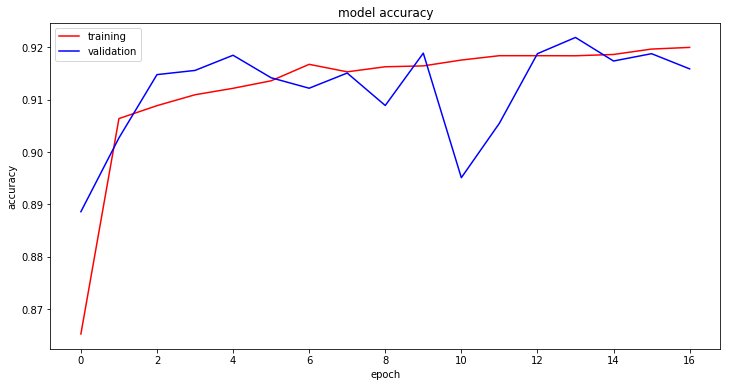

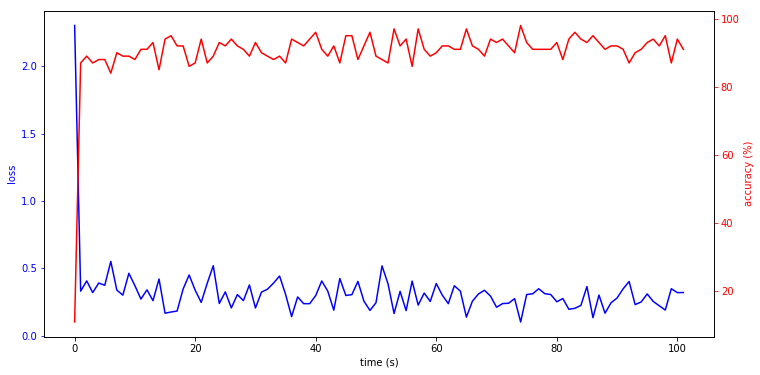

In [11]:
main()

Train on 60000 samples, validate on 10000 samples
Epoch 1/34
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2673 - acc: 0.9182 - val_loss: 0.1059 - val_acc: 0.9665
Epoch 2/34
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0893 - acc: 0.9728 - val_loss: 0.0924 - val_acc: 0.9711
Epoch 3/34
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0600 - acc: 0.9819 - val_loss: 0.0686 - val_acc: 0.9799
Epoch 4/34
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0691 - val_acc: 0.9794
Epoch 5/34
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0371 - acc: 0.9886 - val_loss: 0.0890 - val_acc: 0.9742
Epoch 6/34
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0304 - acc: 0.9901 - val_loss: 0.0748 - val_acc: 0.9808
Epoch 7/34
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0725 - val_acc

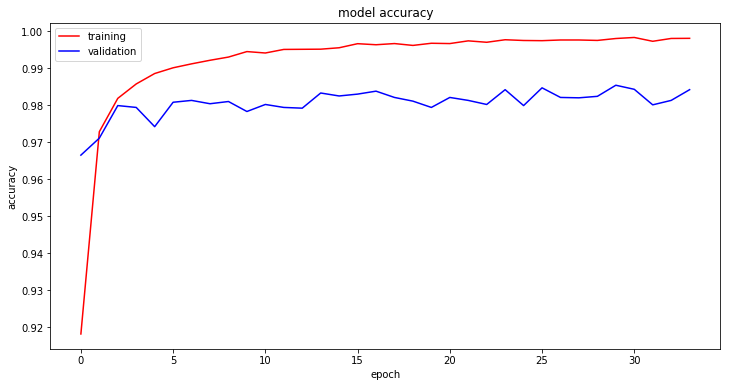

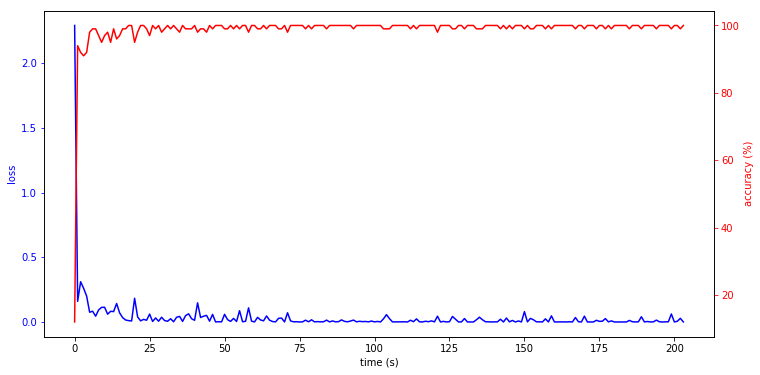

In [13]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import keras

class LogHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))

def main():
    # parameters
    batch_size = 100
    epochs = 34
    learning_rate = 0.001
    Beta1 = 0.9
    Beta2 = 0.999
    epsilon = 1e-8

    # loading the data from local directory
    f = np.load('mnist.npz')
    x_train, y_train = f['x_train'], f['y_train']
    x_valid, y_valid = f['x_test'], f['y_test']
    f.close()

    # number of training and test (validation) samples
    n_train = x_train.shape[0]
    n_valid = x_valid.shape[0]

    # reshaping the input from [60000 28 28] to [60000 784]
    x_train = x_train.reshape(x_train.shape[0], 28*28)
    x_valid = x_valid.reshape(x_valid.shape[0], 28*28)

    # scaling the input to [0,1]
    x_train = x_train/255
    x_valid = x_valid/255

    # one-hot-encoding the labels
    y_train = np_utils.to_categorical(y_train, 10)
    y_valid = np_utils.to_categorical(y_valid, 10)

    # Call back function
    log_history = LogHistory()

    # initialization
    const_init = keras.initializers.Constant(value=0.1)
    trunc_init = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01)

    # defining the model
    model = Sequential()
    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init,
                           input_shape=(28*28,)))

    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init))

    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init))

    model.add(layers.Dense(units=10,
                           activation='softmax'))

    # compiling
    adam = keras.optimizers.Adam(lr=learning_rate,
                                 beta_1=Beta1,
                                 beta_2=Beta2,
                                 epsilon=epsilon)

    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

    # training
    training_log = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_valid, y_valid),
                             callbacks=[log_history])

    # final evaluation
    score, acc = model.evaluate(x_valid, y_valid, batch_size=n_valid)
    print('final model accuracy over the validation set is %.1f%%' % (100*acc))

    # plotting history for accuracy
    plt.figure(figsize=(12,6))
    plt.plot(training_log.history['acc'], color='r', label='training')
    plt.plot(training_log.history['val_acc'], color='b', label='validation')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # plotting history for accuracy 100th iteration
    np_loss = np.array(log_history.loss)[0::100]
    np_acc = np.array(log_history.acc)[0::100]

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(np.arange(len(np_loss)), np_loss, color='b', label='loss')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('loss', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(np_acc)), 100 * np_acc, color='r', label='accuracy')
    ax2.set_ylabel('accuracy (%)', color='r')
    ax2.tick_params('y', colors='r')
    plt.show()

main()

Train on 60000 samples, validate on 10000 samples
Epoch 1/34
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2871 - acc: 0.9112 - val_loss: 0.1134 - val_acc: 0.9648
Epoch 2/34
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1542 - acc: 0.9536 - val_loss: 0.0998 - val_acc: 0.9702
Epoch 3/34
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1312 - acc: 0.9625 - val_loss: 0.0869 - val_acc: 0.9760
Epoch 4/34
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1144 - acc: 0.9669 - val_loss: 0.0806 - val_acc: 0.9766
Epoch 5/34
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1099 - acc: 0.9676 - val_loss: 0.0944 - val_acc: 0.9731
Epoch 6/34
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0991 - acc: 0.9714 - val_loss: 0.0793 - val_acc: 0.9758
Epoch 7/34
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0933 - acc: 0.9727 - val_loss: 0.0699 - val_acc

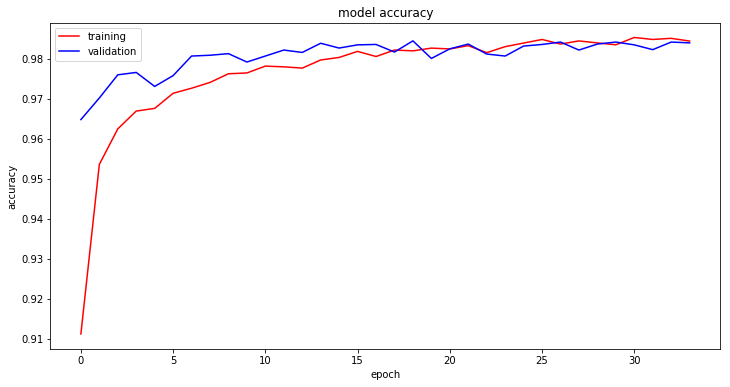

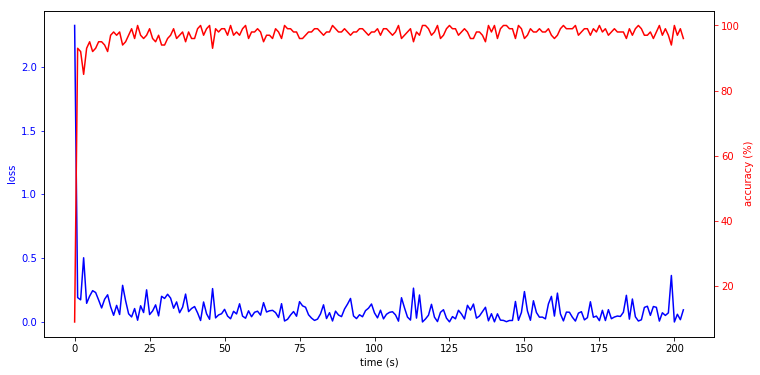

In [15]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import keras


class LogHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))


def main():
    # parameters
    batch_size = 100
    epochs = 34
    learning_rate = 0.001
    Beta1 = 0.9
    Beta2 = 0.999
    epsilon = 1e-8

    # loading the data from local directory
    f = np.load('mnist.npz')
    x_train, y_train = f['x_train'], f['y_train']
    x_valid, y_valid = f['x_test'], f['y_test']
    f.close()

    # number of training and test (validation) samples
    n_train = x_train.shape[0]
    n_valid = x_valid.shape[0]

    # reshaping the input from [60000 28 28] to [60000 784]
    x_train = x_train.reshape(x_train.shape[0], 28*28)
    x_valid = x_valid.reshape(x_valid.shape[0], 28*28)

    # scaling the input to [0,1]
    x_train = x_train/255
    x_valid = x_valid/255

    # one-hot-encoding the labels
    y_train = np_utils.to_categorical(y_train, 10)
    y_valid = np_utils.to_categorical(y_valid, 10)

    # initialization
    const_init = keras.initializers.Constant(value=0.1)
    trunc_init = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01)

    # Call back function
    log_history = LogHistory()

    # defining the model
    model = Sequential()
    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init,
                           input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=1500,
                           activation='relu',
                           use_bias=True,
                           kernel_initializer=trunc_init,
                           bias_initializer=const_init))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=10,
                           activation='softmax'))

    # compiling
    adam = keras.optimizers.Adam(lr=learning_rate,
                                 beta_1=Beta1,
                                 beta_2=Beta2,
                                 epsilon=epsilon)

    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

    # training
    training_log = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_valid, y_valid),
                             callbacks=[log_history])

    # final evaluation
    score, acc = model.evaluate(x_valid, y_valid, batch_size=n_valid)
    print('final model accuracy over the validation set is %.1f%%' % (100*acc))

    # plotting history for accuracy
    plt.figure(figsize=(12,6))
    plt.plot(training_log.history['acc'], color='r', label='training')
    plt.plot(training_log.history['val_acc'], color='b', label='validation')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # plotting history for accuracy 100th iteration
    np_loss = np.array(log_history.loss)[0::100]
    np_acc = np.array(log_history.acc)[0::100]

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(np.arange(len(np_loss)), np_loss, color='b', label='loss')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('loss', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(np_acc)), 100 * np_acc, color='r', label='accuracy')
    ax2.set_ylabel('accuracy (%)', color='r')
    ax2.tick_params('y', colors='r')
    plt.show()

main()

Train on 60000 samples, validate on 10000 samples
Epoch 1/34
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3246 - acc: 0.8998 - val_loss: 0.0746 - val_acc: 0.9769
Epoch 2/34
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0685 - acc: 0.9797 - val_loss: 0.0452 - val_acc: 0.9847
Epoch 3/34
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0501 - acc: 0.9848 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 4/34
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0333 - val_acc: 0.9885
Epoch 5/34
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0381 - val_acc: 0.9890
Epoch 6/34
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0331 - val_acc: 0.9892
Epoch 7/34
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0291 - val_acc

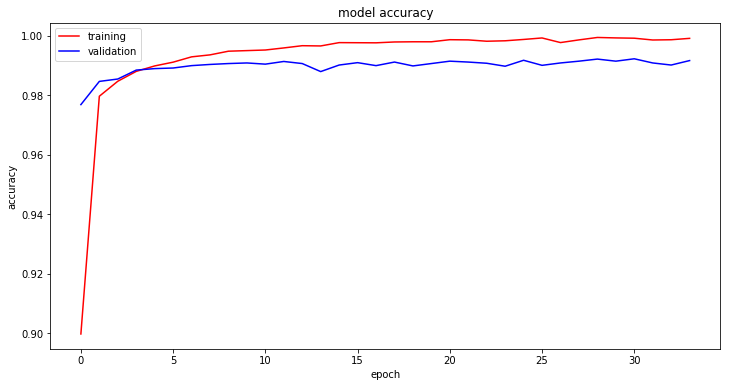

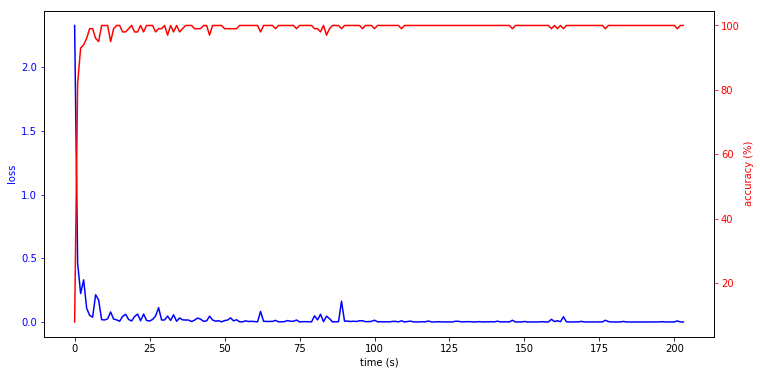

In [16]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras import initializers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.callbacks import Callback


class LogHistory(Callback):

    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))


def main():
    # parameters
    batch_size = 100
    epochs = 34
    learning_rate = 0.001
    Beta1 = 0.9
    Beta2 = 0.999
    epsilon = 1e-8

    # loading the data from local directory
    f = np.load('mnist.npz')
    x_train, y_train = f['x_train'], f['y_train']
    x_valid, y_valid = f['x_test'], f['y_test']
    f.close()

    # number of training and test (validation) samples
    n_train = x_train.shape[0]
    n_valid = x_valid.shape[0]

    # reshaping the input from [60000 28 28] to [60000 28 28 1]
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

    # scaling the input to [0,1]
    x_train = x_train/255
    x_valid = x_valid/255

    # one-hot-encoding the labels
    y_train = np_utils.to_categorical(y_train, 10)
    y_valid = np_utils.to_categorical(y_valid, 10)

    # Call back function
    log_history = LogHistory()

    # initialization
    const_init = initializers.Constant(value=0.1)
    trunc_init = initializers.TruncatedNormal(mean=0.0, stddev=0.01)

    # defining the model
    model = Sequential()
    model.add(layers.Conv2D(filters=32,
                            kernel_size=(5, 5),
                            strides=(1, 1),
                            padding='same',
                            use_bias=True,
                            kernel_initializer=trunc_init,
                            bias_initializer=const_init,
                            activation='relu',
                            input_shape=(28, 28, 1)))

    model.add(layers.MaxPooling2D(pool_size=(2,2),
                                  strides=(2,2),
                                  padding='same'))

    model.add(layers.Conv2D(filters=64,
                            kernel_size=(5, 5),
                            strides=(1, 1),
                            padding='same',
                            use_bias=True,
                            kernel_initializer=trunc_init,
                            bias_initializer=const_init,
                            activation='relu'))

    model.add(layers.MaxPooling2D(pool_size=(2,2),
                                  strides=(2,2),
                                  padding='same'))

    model.add(layers.Flatten())

    model.add(layers.Dense(units=10,
                           activation='softmax'))

    # compiling
    adam = optimizers.Adam(lr=learning_rate,
                           beta_1=Beta1,
                           beta_2=Beta2,
                           epsilon=epsilon)

    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

    # training
    training_log = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_valid, y_valid),
                             callbacks=[log_history])

    # final evaluation
    score, acc = model.evaluate(x_valid, y_valid, batch_size=n_valid)
    print('final model accuracy over the validation set is %.1f%%' % (100*acc))


    # plotting history for accuracy
    plt.figure(figsize=(12,6))
    plt.plot(training_log.history['acc'], color='r', label='training')
    plt.plot(training_log.history['val_acc'], color='b', label='validation')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # plotting history for accuracy 100th iteration
    np_loss = np.array(log_history.loss)[0::100]
    np_acc = np.array(log_history.acc)[0::100]

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(np.arange(len(np_loss)), np_loss, color='b', label='loss')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('loss', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(np_acc)), 100 * np_acc, color='r', label='accuracy')
    ax2.set_ylabel('accuracy (%)', color='r')
    ax2.tick_params('y', colors='r')
    plt.show()

main()

The linear model, seems to be overfitting because the accuracy over the training data is increasing but it is reducing over the validation data. Also, the final accuracy is about 92% for test data and 90% for validation data.
For the MLP without dropout (simple), overfitting is not as pronounced as the linear model but the learning rate reduces (saturates) after 10 batch training. The final accuracy over the training data is about 99.8% and 98% over the validation data.
Regarding the MLP with dropout, the model does not overfit and the accuracy for both training and validation data leans towards 98% and would keep growing for more itteration.
Finally, the convolutional model has marginal overfitting but the accuracy over both training data and validation data us very high (99.9% for training and 99.2% for validation)

Dropout has better results against overfitting but convolutional network is has higher accuracy.

the number of weights and biases in convolutional network is much much less than the MLP method (even with dropout). By the approximation, the number of parameters to be optimized in the MLP is the sqrt of those in convolutional one.